In [2]:
import math

In [3]:
def S_rotation(n):
        return 2*S_cnot(n)
def S_2angles(n):
    d=S_rotation(1)*4+2*S_cnot(n-1)+S_rotation(n-1)
    return d

In [4]:
cesh=[]
m=15000
for i in range(m):
    cesh.append(0)
cesh[1]=1
cesh[2]=6
cesh[3]=14
cesh[4]=18

def S_cnot(n):
    if cesh[n]==0 and n!=0:
        cesh[n]=2*S_cnot(math.ceil(n/2)+1)+2*S_cnot(n//2)
    return cesh[n]

for i in range(m):
    S_cnot(i)

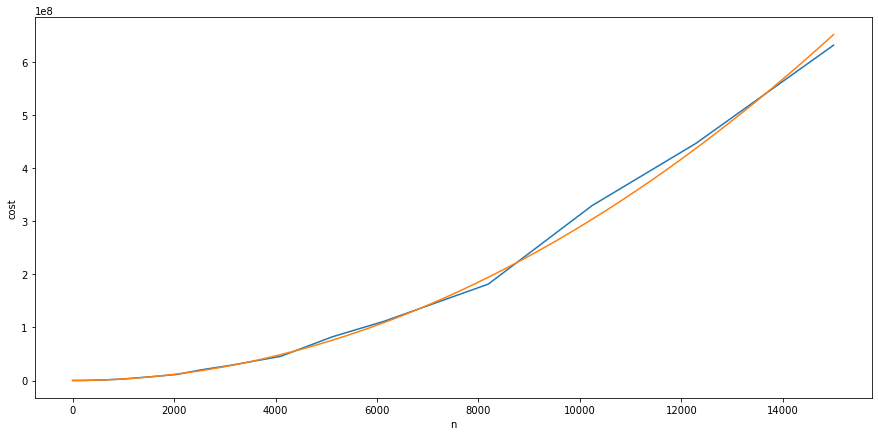

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

funct=[0 for i in range(m)]

for i in range(m):
    funct[i]=2.9*i**2


data = cesh
plt.figure(figsize=(15, 7))
    
plt.plot(data)
plt.plot(funct)
#plt.plot(sqrtN)
plt.xlabel('n')
plt.ylabel('cost')
plt.show()

In [6]:
#directly  rotation on 4 angles with decomposed subcircuits for 2 angles
def S_4angles_1method(n):
    k=2 #active controllers\n",
    d=0
    if n>2:
        d=4*S_2angles(k)+2*k*S_cnot(n-k)+S_2angles(n-1)+4*(k-1)
    elif n==2:
        d=2*S_2angles(n)

    return d

In [7]:
def min4(n):
    if S_4angles_2method(n)<S_4angles_1method(n):
        min4=S_4angles_2method(n)
        print("for 4 angles and ",n," controllers better method 2")
    else: 
        min4=S_4angles_1method(n)
        print("for 4 angles and ",n, "controllers better method 1")
    return min4

In [8]:
def S_8angles_1method(n):
        k=3
        
        d=min4(k)*4 #per 4 angles
        d=d+ 2*k*S_cnot(n-k) 
        d=d+ min4(n-1)
        d=d+4*(k-1)
        return d

In [9]:
 # 8 angles = 2 per 4 angles
def S_8angles_2method(n):
        
        d=2*min4(n)
        return d

In [10]:
# 8 angles = 4 per 2 angles
def S_8angles_3method(n):
        
        d=4*S_2angles(n)
        return d

In [11]:
def min8(n):
        if S_8angles_1method(n)<S_8angles_2method(n):
            if S_8angles_1method(n)<S_8angles_3method(n):
                min8=S_8angles_1method(n)
                met=1
            else:
                min8=S_8angles_3method(n)
                met=3
        else:
            if S_8angles_2method(n)<S_8angles_3method(n):
                min8=S_8angles_2method(n)
                met=2
            else:
                min8=S_8angles_3method(n)
                met=3
        print("for 8 angles and ",n," controllers better method ", met)
            
        return min8

In [12]:
def S_2powGangles(g,n):
        if S_general_cesh[n][g]==0:
            
            t=2**(g)
            k=g
          #  if g==3: return min8(n)
          #  if g==2: return min4(n)
            if g==1: return S_2angles(n)
          #  if n==g: 
          #      minGk = S_rotation(n)*2**g
          #  else:
          #      minGk=S_2powGangles(g,g)
            minGk=S_2powGangles(g-1,g) 
            minGnmin1=S_2powGangles(g-1,n-1)
    
    
            d1=minGk*4 + 2*k*S_cnot(n-k) + minGnmin1+4*(k-1)
          #  q=2
          #  dd=[]
          #  dd.append((d1,1))
          #  r=g-1
          #  while q!=t:
          #      dd.append((q*S_2powGangles(r,n),q))
          #      q=q*2
          #      r=r-1
    
            r=g-1
            q=2
            minS=d1
            met=1
            listans=[]
            while q!=t:
                ddd=q*S_2powGangles(r,n)
             #   print(\q=\,q,\r=\,r,\ddd=\,ddd)
                if minS>ddd:
                    met=q
                    minS=ddd
                elif minS==ddd and met>2:
                    listans.append(met)
                q=q*2 
                r=r-1    
    
           # print(\for 2^\, g, \ angles and \,n,\ controllers better method of division angles by\, met,' list ans = ',listans)
            S_general_cesh[n][g]=minS
            S_general_cesh_met[n][g]=met
            
    
        return  S_general_cesh[n][g]

In [13]:
Z=500
S_general_cesh=[[0 for j in range(Z)] for i in range(Z)]
S_general_cesh_met=[[0 for j in range(Z)] for i in range(Z)]
    


In [14]:
for n in range(1,Z):
        
    S_general_cesh[n][0]=S_rotation(n)
    S_general_cesh[n][1]= 0 if n<1 else S_2angles(n)

In [17]:
ff=[[0 for j in range(Z)] for i in range(Z)]
for n in range(2,Z):
   # print('*******************    n=', n,' **********************************')
    for g in range(1,n):
        f=S_2powGangles(g,n)
        ff[n][g]=f
    #    print(\optimum for (n,g)=(\, n,\,\,g, \) angles is \,f)

#print(ff)


In [18]:
Z=500
fff=[0 for j in range(Z)]
fun=[0 for j in range(Z)]
for n in range(2,Z):
    fff[n]=ff[n][n-1]
    fun[n]=2**(n)*((n-1)**2/(0.1*n))
    #fun[n]=2**(n)*((n-1)**(2*math.log2(n)))

In [17]:
Z=500
fff=[0 for j in range(Z)]
fun=[0 for j in range(Z)]
for n in range(2,Z):
    fff[n]=ff[n][n-1]/(2**(n)*((n-1)**2))
    fun[n]=6/n
    #fun[n]=2**(n)*((n-1)**(2*math.log2(n)))

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
    
data = fff
data=[fff[i] for i in range(2,9)]
funn=[fun[i] for i in range(2,9)]
plt.figure(figsize=(17, 7))
    
plt.plot(data)
plt.plot(funn)
#plt.plot(sqrtN)
plt.xlabel('n')
plt.ylabel('first appeared 2')
#plt.yscale('log')
plt.show()

NameError: name 'type_check' is not defined

In [24]:
import csv
     
myData = ff
     
myFile = open('complexOptima.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(myData)

In [19]:
import csv
     
myData = S_general_cesh_met
     
myFile = open('methods2.csv', 'w')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(myData)
    
print(S_general_cesh_met)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [19]:
count= [0 for i in range(Z)]
    
for n in range(1,200):
    for g in range(1,200):
        count[S_general_cesh_met[n][g]]+=1
#print(count)

#print(S_general_cesh_met)

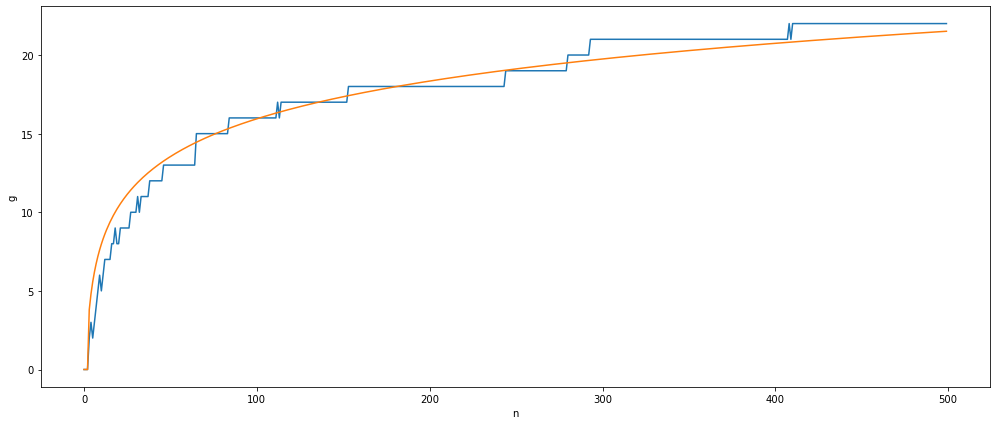

In [22]:
Z=500
firstTwo=[0 for i in range(Z)]
functN=[0 for i in range(Z)]
sqrtN=[0 for i in range(Z)]
for n in range(3,Z):
    j=2
    while j!=Z and S_general_cesh_met[n][j]!=2:
        j+=1
    firstTwo[n]=j
    functN[n]=math.log2(n)*2.4
    sqrtN[n]=n**0.4
    
import matplotlib.pyplot as plt
import pandas as pd
    
data = firstTwo
plt.figure(figsize=(17, 7))
    
plt.plot(data)
plt.plot(functN)
#plt.plot(sqrtN)
plt.xlabel('n')
plt.ylabel('g')
plt.show()

For the paper

We exploit both methods recursively while divide the circuit into different parts and decompose these subcircuits according to the method which gives a better CNOT-cost for the resulting circuit. Also, we estimated a gate-costs for different values $n$ of control qubits in a subcircuit and different amounts $g$ of angles requiered in a subcircuit to rotate the target qubit on. We constructed a recursive function to determine the correspondence between  the values of pairs $(n,g)$ and the methods of decomposition. The graphic shows for what values of $(n,g)$ the 2nd method is getting be better with respect to a CNOT-cost. 

The obtained graphic can be approximated by the function $2.4 \log(n)$. So, we get that for the values $g$ approximately less than $2.4 \log(n)$ the first method of decomposition works better. For $g>2.4 \log(n)$, the 2nd method gives better results.
